In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, MonthLocator, DayLocator, DateFormatter
import csv
import datetime as dt
import pandas as pd

In [2]:
df = pd.read_csv('taxi_trips_per_day.csv', header=None)
df.index = pd.to_datetime(df[0], format='%Y-%m-%d')
months = df.groupby(by=[df.index.month, df.index.year]).sum()

d = months.to_dict()[1]
Y19_months = []
Y20_months = []
dates = []
for x in d.items():
    if x[0][1] == 2019:
        Y19_months.append(x[1])
    else:
        Y20_months.append(x[1])

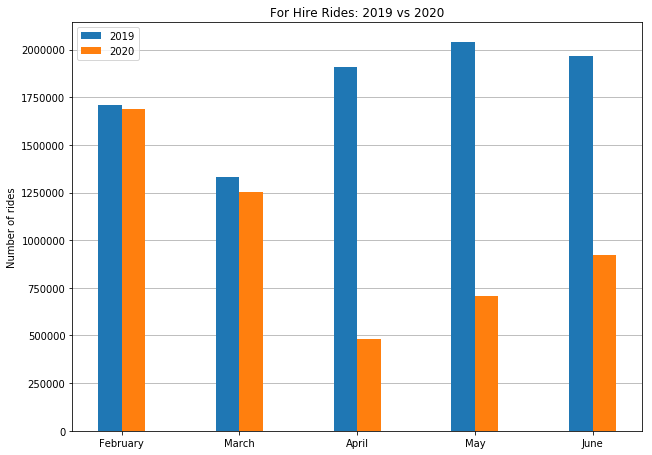

In [3]:
labels = ['February', 'March', 'April', 'May', 'June']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Y19_months, width, label='2019', zorder=3)
rects2 = ax.bar(x + width/2, Y20_months, width, label='2020', zorder=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of rides')
ax.set_title('For Hire Rides: 2019 vs 2020')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y', zorder=0)

fig.tight_layout()
fig.set_figheight(7)
fig.set_figwidth(10)
plt.show()

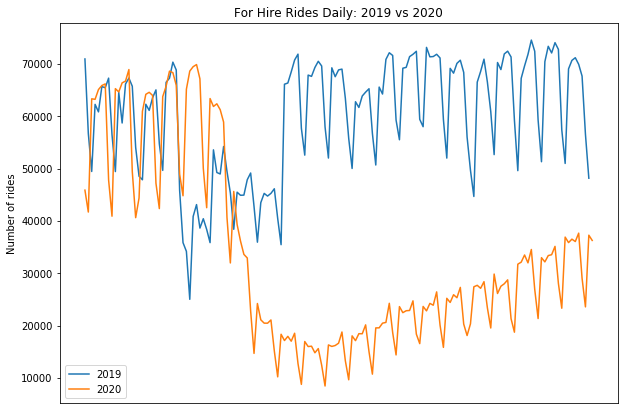

In [4]:
df = pd.read_csv("taxi_trips_per_day.csv", names=["date", "count"])
df["date"] = pd.to_datetime(df['date'])

prev_year = df["count"][df["date"] < "2019-7"].reset_index()
# we do not include december, since we do not have data for it in 2020
curr_year = df["count"][df["date"] >= "2020-01"].reset_index()
curr_year['index'] = curr_year['index']-150

dates = df["date"][df["date"] >= "2020-01"]
diffs_count = (curr_year - prev_year) / prev_year * 100


# df = pd.read_csv('taxi_trips_per_day.csv', header=None)
# d = df.values.tolist()
# dates_list = [dt.datetime.strptime(x[0],'%Y-%m-%d') for x in d]
# rides = [x[1] for x in d]

fig, ax = plt.subplots()
ax.set_ylabel('Number of rides')
ax.set_title('For Hire Rides Daily: 2019 vs 2020')
ax.plot(dates[:-1], prev_year['count'], label='2019')
ax.plot(dates, curr_year['count'], label='2020')
ax.legend()
plt.xticks([])
fig.set_figheight(7)
fig.set_figwidth(10)
plt.show()

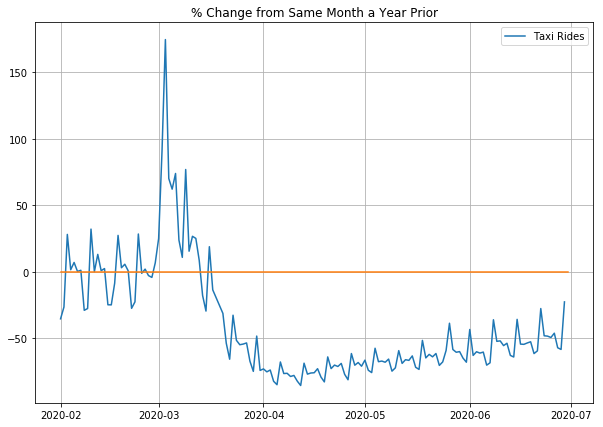

In [5]:
df = pd.read_csv("taxi_trips_per_day.csv", names=["date", "count"])
df["date"] = pd.to_datetime(df['date'])

prev_year = df["count"][df["date"] < "2019-12"].reset_index()
# we do not include december, since we do not have data for it in 2020
curr_year = df["count"][df["date"] >= "2020-01"].reset_index()

dates = df["date"][df["date"] >= "2020-01"]
diffs_count = (curr_year - prev_year) / prev_year * 100

f, ax = plt.subplots()
ax.plot(dates, diffs_count["count"])
ax.plot(dates, [0] * len(dates))
ax.set_title('% Change from Same Month a Year Prior')
ax.grid(True)
f.set_figheight(7)
f.set_figwidth(10)

plt.legend(["Taxi Rides"])
plt.show()